# Question 4

# Can we predict that Is there Crisis JST in the present/coming year?

In [5]:
#Packages Import
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_squared_error, auc,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Data Frame and Missing Values
df = pd.read_csv('dataset.csv')
#deu = df[df['iso'] == "FRA"]

deu_filled = df.fillna(df.median())

In [6]:
#Predictors and Target Values and Data Splitting 
X = deu_filled[['cpi', 'rgdp' ,'govcris','protests', 'gdppeak']]
y = (deu_filled['pk_norm']) | (deu_filled['pk_dis'])| (deu_filled['pk_fin'])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y,test_size=0.2)


# Apply Logistic Regression

In [7]:
model_log = LogisticRegression(penalty='l2',C = 1,random_state = 0)

fitted_Model = model_log.fit(X_Train,Y_Train)
predictions = fitted_Model.predict(X_Test)


C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
print('Logistic Regression')
print('Confusion Matrix')
print(confusion_matrix(Y_Test,predictions))

[[487   0]
 [  0  93]]


In [9]:
print('Accuracy Score')
print(accuracy_score(Y_Test,predictions))
print('Roc_auc Score')
print(roc_auc_score(Y_Test,predictions))

1.0
1.0


# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model = GaussianNB()

fittedModel = model.fit(X_Train,Y_Train)
predict = fittedModel.predict(X_Test)
#priors=None, var_smoothing=1e-09
print('Gaussian Naive Bayes')
print('Confusion Matrix')
print(confusion_matrix(Y_Test,predict))
print('Accuracy Score')
print(accuracy_score(Y_Test,predict))
print('Roc_auc Score'
print(roc_auc_score(Y_Test,predict))

[[481   6]
 [ 91   2]]
0.8327586206896552
0.5045925239009957


In [12]:
#Confusion Matrix
nb_roc = roc_auc_score(Y_Test,predict)
fpr1,tpr1,thresholds1=roc_curve(Y_Test,fittedModel.predict_proba(X_Test)[:,1])

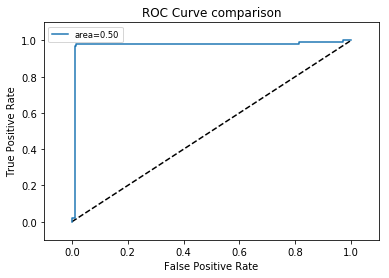

In [13]:
plt.title('ROC Curve comparison')
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr,tpr, label="area=%0.2f" %log_roc)
plt.plot(fpr1,tpr1, label="area=%0.2f" %nb_roc)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

# KNN simple confusion matrix

In [14]:
knn = KNeighborsClassifier(n_neighbors= 10)
fit_knn = knn.fit(X_Train,Y_Train)
predict = fit_knn.predict(X_Test)

print('K Nearest Neighbour')
print('Confusion Matrix')
print(confusion_matrix(Y_Test,predict))
print('Accuracy Score')
print(accuracy_score(Y_Test,predict))
print('Roc_auc Score')
print(roc_auc_score(Y_Test,predict))

[[487   0]
 [ 72  21]]
0.8758620689655172
0.6129032258064516


# KNN Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV
k_range = range(1,10)
prm_gr = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid=prm_gr, cv=10, scoring='accuracy')
grid.fit(X,y)
print('K Nearest Neighbour after Parameter Tuning')
print('Best Score')
print(grid.best_score_)
print('Best Parameters')
print(grid.best_params_)
print(grid.best_estimator_)

0.893448275862069
{'n_neighbors': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')


In [16]:
af_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')
fit_knn = af_knn.fit(X_Train,Y_Train)
predict = fit_knn.predict(X_Test)


print(confusion_matrix(Y_Test,predict))
print(accuracy_score(Y_Test,predict))
print(roc_auc_score(Y_Test,predict))

[[484   3]
 [ 55  38]]
0.9
0.7012209931332937


# Decision Tree Simple

In [17]:
from sklearn.tree import DecisionTreeClassifier 

In [18]:
dtalg = DecisionTreeClassifier() 
dtalg.fit(X_Train, Y_Train)
predict = dtalg.predict(X_Test)

print('confusion Matrix')
print(confusion_matrix(Y_Test,predict))
print('Accuracy Score')
print(accuracy_score(Y_Test,predict))
print('Roc_auc Score')
print(roc_auc_score(Y_Test,predict))

[[487   0]
 [  0  93]]
1.0
1.0


# Decision Tree Parameter Tuning

In [19]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              
             }

tune_model = GridSearchCV(dtalg, 
                    param_grid=param_grid, cv=12, scoring = 'roc_auc')
tune_model.fit (X_Train, Y_Train)

print('Decision Tree')
print('AFTER tuning Parameters: ', tune_model.best_params_)
print("Training score: {:.2f}". format(tune_model.score(X_Train, Y_Train))) 
print("Test score: {:.2f}". format(tune_model.score(X_Test, Y_Test)))

AFTER tuning Parameters:  {'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
Training score: 1.00
Test score: 1.00


In [57]:
#After Tuning
af_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, splitter='best')
fit_dt = af_dt.fit(X_Train,Y_Train)
predict = fit_dt.predict(X_Test)

print('Confusion Matrix')
print(confusion_matrix(Y_Test,predict))
print('Accuracy score')
print(accuracy_score(Y_Test,predict))
print('Roc_auc Score')
print(roc_auc_score(Y_Test,predict))

[[508  12]
 [  5  55]]
0.9706896551724138
0.9467948717948717


Text(0.5, 1.0, 'Accuracy and Roc_auc Score Difference')

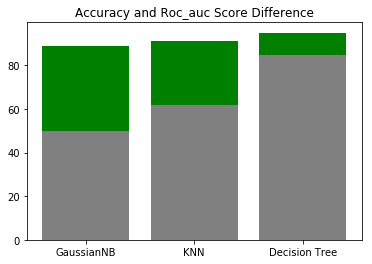

In [74]:
#Comparison 
d =[89,91,95]
a =[50,62,85]
b = ['GaussianNB','KNN','Decision Tree']
#col = df.ccode
plt.bar(b,d, color='g')
plt.bar(b,a, color='grey')
plt.title('Accuracy and Roc_auc Score Difference')

Text(0.5, 1.0, 'Accuracy and Roc_auc Score Difference After Parameter Tuning')

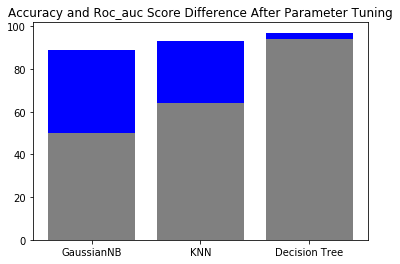

In [75]:
#After Parameter Tuning Comparison
acc =[89,93,97]
auc =[50,64,94]
b = ['GaussianNB','KNN','Decision Tree']
#col = df.ccode
plt.bar(b,acc, color='b')
plt.bar(b,auc, color='grey')
plt.title('Accuracy and Roc_auc Score Difference After Parameter Tuning')